In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import sys

In [2]:
waves_year=pd.read_excel('2002-2020 storm.xlsx', sheet_name='2018', names=['Date', 'Hsig', 'Hmax', 'Tz', 'Tsig', 'TP1', 'WDIR_BUOY'])
Storm = pd.read_excel('2002-2020 storm.xlsx', sheet_name='Storm', names=['Date', 'Hsig', 'Hmax', 'Tz', 'Tsig', 'TP1', 'WDIR_BUOY'])
waves_year

,Date,Hsig,Hmax,Tz,Tsig,TP1,WDIR_BUOY
0,2018-01-01 00:00:00,1.407,2.46,5.49,6.90,7.28,73
1,2018-01-01 01:00:00,1.344,2.45,5.35,6.75,5.98,71
2,2018-01-01 02:00:00,1.354,2.18,5.53,6.86,6.16,85
3,2018-01-01 03:00:00,1.229,1.89,5.45,7.17,10.83,158
4,2018-01-01 04:00:00,1.200,2.13,5.53,7.06,6.36,82
...,...,...,...,...,...,...,...
8161,2018-12-31 19:00:00,1.360,2.45,5.83,7.09,6.79,65
8162,2018-12-31 20:00:00,1.374,2.84,5.74,7.14,6.16,62
8163,2018-12-31 21:00:00,1.339,2.63,5.63,7.06,6.36,68
8164,2018-12-31 22:00:00,1.347,2.86,5.64,7.00,5.98,71


## Wave direction

([2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0],
 [Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12'),
  Text(0, 14.0, '14'),
  Text(0, 16.0, '16')])

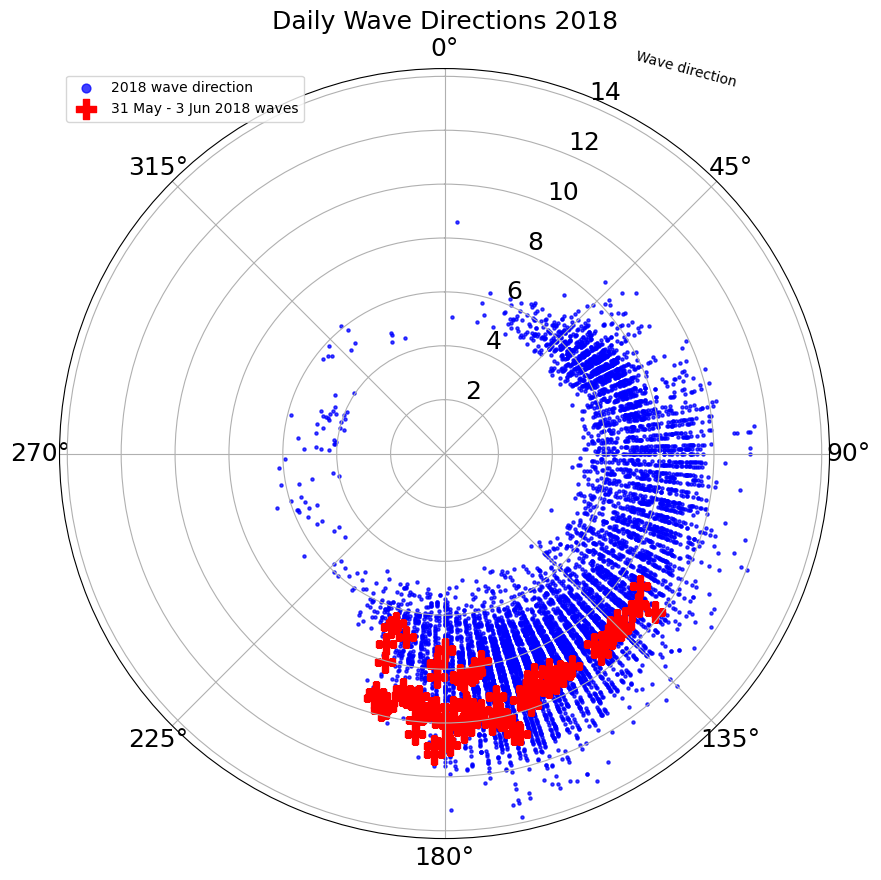

In [3]:
ax = plt.figure(figsize=(10,10))
ax = plt.subplot(111, polar=True)

ax.scatter(x=[math.radians(x) for x in waves_year['WDIR_BUOY'].values], y=waves_year['Tsig'], label='2018 wave direction',color='blue', alpha=0.75, s=5)
ax.scatter(x=[math.radians(x) for x in Storm['WDIR_BUOY'].values], y=Storm['Tsig'], label='31 May - 3 Jun 2018 waves', color='red', marker="P", s=200)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)


rlab = plt.ylabel('Wave direction', size=10)
rlab.set_position((1,0.99))
ax.yaxis.labelpad=-450
rlab.set_rotation(-15)
lgnd = plt.legend( loc = 'upper left')
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [200]
plt.title('Daily Wave Directions 2018', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

In [4]:
r = 997
g= 9.9
pi= 3.14

In [5]:
def wave_power(H,T):
    # Linear wave theoryy 
    P = (r * np.power(g,2)* T)/ 32*pi
    return round((P/1000),2)

In [6]:
waves_year['power'] = wave_power(waves_year['Hsig'], waves_year['Tsig'] )
Storm['power'] = wave_power(Storm['Hsig'], Storm['Tsig'] )

In [7]:
waves_year

,Date,Hsig,Hmax,Tz,Tsig,TP1,WDIR_BUOY,power
0,2018-01-01 00:00:00,1.407,2.46,5.49,6.90,7.28,73,66.16
1,2018-01-01 01:00:00,1.344,2.45,5.35,6.75,5.98,71,64.72
2,2018-01-01 02:00:00,1.354,2.18,5.53,6.86,6.16,85,65.78
3,2018-01-01 03:00:00,1.229,1.89,5.45,7.17,10.83,158,68.75
4,2018-01-01 04:00:00,1.200,2.13,5.53,7.06,6.36,82,67.69
...,...,...,...,...,...,...,...,...
8161,2018-12-31 19:00:00,1.360,2.45,5.83,7.09,6.79,65,67.98
8162,2018-12-31 20:00:00,1.374,2.84,5.74,7.14,6.16,62,68.46
8163,2018-12-31 21:00:00,1.339,2.63,5.63,7.06,6.36,68,67.69
8164,2018-12-31 22:00:00,1.347,2.86,5.64,7.00,5.98,71,67.12


([20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0],
 [Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140')])

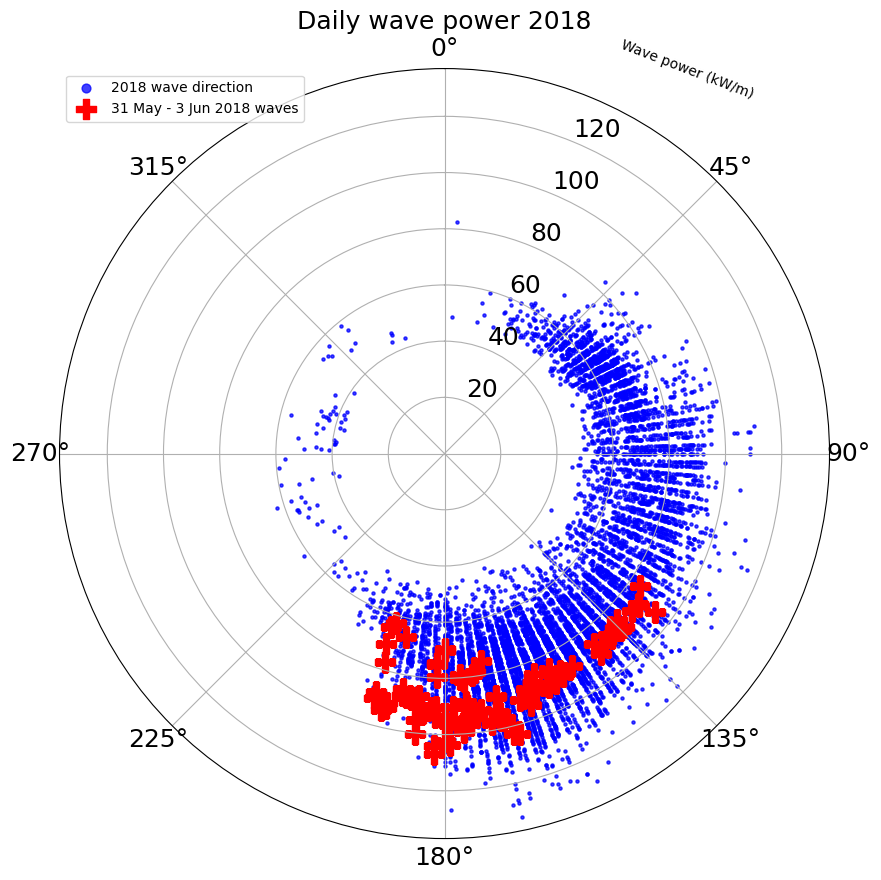

In [8]:
ax = plt.figure(figsize=(10,10))
ax = plt.subplot(111, polar=True)

ax.scatter(x=[math.radians(x) for x in waves_year['WDIR_BUOY'].values], y=waves_year['power'], label='2018 wave direction',color='blue', alpha=0.75, s=5)
ax.scatter(x=[math.radians(x) for x in Storm['WDIR_BUOY'].values], y=Storm['power'], label='31 May - 3 Jun 2018 waves', color='red', marker="P", s=200)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

rlab = plt.ylabel('Wave power (kW/m)', size=10)
rlab.set_position((1,0.99))
ax.yaxis.labelpad=-450
rlab.set_rotation(-21)
lgnd = plt.legend(loc="upper left")
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [200]
plt.title('Daily wave power 2018', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)